## Step 1: Import | Install packages and libraries


In [13]:
# Load in necessary libraries and packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import altair as alt
alt.renderers.enable('notebook') 

import warnings
warnings.filterwarnings('ignore')

In [14]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize 
from bs4 import BeautifulSoup as bs
import requests as r
import pandas as pd
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ansulsinha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ansulsinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2: Load and Organize Data. Remove stop words.


In [16]:
reviews = pd.read_json('test_data/reviews.json')
stop = stopwords.words('english')
reviews['removed_stopwords_reviews'] = reviews['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Insight: Add a "Target" column that is the rating of the review. Count the number of reviews (there are more 5 and 4 reviews than 1, 2 and 3 combined.

In [17]:
train_features = reviews
train_features['Target'] = train_features['stars']
train_features.Target.value_counts()


5    506
4    372
3    175
2     72
1     52
Name: Target, dtype: int64

## Step 3: Replace 1, 2, 3 and 4 star reviews with 0 "bad" and 5 stars to 1 "good"
### This is to balance the number of good and bad reviews so the model works better (verus an unfair balace).

In [18]:
train_features['Target'] = train_features['Target'].replace({1: 0})
train_features['Target'] = train_features['Target'].replace({2: 0})
train_features['Target'] = train_features['Target'].replace({3: 0})
train_features['Target'] = train_features['Target'].replace({4: 0})
train_features['Target'] = train_features['Target'].replace({5: 1})


# Create table for outcomes
train_labels = pd.Series([])
train_labels['outcome'] = train_features['Target']

In [19]:
train_features.Target.value_counts()


0    671
1    506
Name: Target, dtype: int64

## Step 4: Split data into train and test data 

In [20]:
# Split data into train and test data 
train_feats, test_feats, train_outcome, test_outcome = train_test_split(
    train_features,
    train_labels.outcome,
    test_size =.3
)


## Multinomial Naive Bayes Classifier

#### Import and make pipeline

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

NB_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#### Fit the model

In [22]:
NB_model.fit(train_features.removed_stopwords_reviews, train_features.Target)
labels = NB_model.predict(test_feats.removed_stopwords_reviews)

#### Create a confusion matrix to visualize accuracy (true positive, true negative, false positive, false negative)

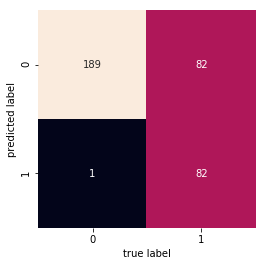

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_feats.Target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Create a function to predict the rating of a review.

In [24]:
def predict_category(s, train=train_feats, model=NB_model):
    pred = model.predict([s])
    return train.Target[pred[0]]

In [25]:
predict_category('good great best ever')


1